In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [25]:
df_cleaned = pd.read_csv("cleanedv1.csv")
df_cleaned = df_cleaned.dropna()
df_cleaned["is_A"] = df_cleaned["score"] < 14
df_cleaned["is_A"] = df_cleaned["is_A"].astype(int)
df_cleaned = df_cleaned[["std_yelp_rating","std_yelp_review_count","std_chain_size","yelp_price","is_A"]]
df_cleaned = pd.get_dummies(df_cleaned)
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=1)
train, validation = train_test_split(train, test_size=0.2, random_state=1)

In [27]:
train_x = train.drop(columns=["is_A"])
test_x = test.drop(columns=["is_A"])
validation_x = validation.drop(columns=["is_A"])



In [41]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(train_x, train["is_A"])
predicted_test_y = regr.predict(test_x)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test["is_A"], predicted_test_y))

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

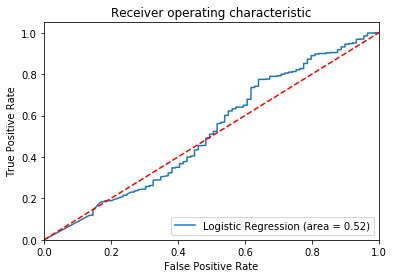

In [46]:
logit_roc_auc = roc_auc_score(test["is_A"], predicted_test_y)
fpr, tpr, thresholds = roc_curve(test["is_A"], predicted_test_y)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [43]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
train.columns
# Train the model on training data
rf.fit(train_x, train["is_A"]);

In [44]:
predicted_test_y = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predicted_test_y - test["score"])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test["score"], predicted_test_y))

KeyError: 'score'

In [ ]:
#What I should really be looking at in fact is simply whether or not the restaurant would be graded A
#The rest is fluff